In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
from sklearn.preprocessing import LabelEncoder, scale, StandardScaler, Normalizer
from sklearn.model_selection import RandomizedSearchCV

Read files

In [79]:
car_train=pd.read_csv("../data/train.csv")
car_test=pd.read_csv("../data/test.csv")

# Modelos

In [80]:
from sklearn.metrics import r2_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

In [81]:
def classifier_models(X_train, X_test, y_train, y_test, scoring, N_SPLITS):

    # KNeighborsClassifier
    print("KNeighborsClassifier\n")
    neigh = KNeighborsClassifier()
    model_report(neigh, X_train, X_test, y_train, y_test, scoring, N_SPLITS)
    
    # Decision Tree
    print("\nDecisionTreeClassifier\n")
    dec_tree = DecisionTreeClassifier(random_state=42)
    model_report(dec_tree, X_train, X_test, y_train, y_test, scoring, N_SPLITS)
    
    # RandomForestClassifier
    print("\nRandomForestClassifier\n")
    rf_clf = RandomForestClassifier(random_state=42)
    model_report(rf_clf, X_train, X_test, y_train, y_test, scoring, N_SPLITS)
    
    # ExtraTreesClassifier
    print("\nExtraTreesClassifier\n")
    et_clf = ExtraTreesClassifier(random_state=42)
    model_report(et_clf, X_train, X_test, y_train, y_test, scoring, N_SPLITS)
    
    # AdaBoostClassifier
    print("\nAdaBoostClassifier\n")
    ab_clf = AdaBoostClassifier(random_state=42)
    model_report(ab_clf, X_train, X_test, y_train, y_test, scoring, N_SPLITS)

In [82]:
def svm_models(X_train, X_test, y_train, y_test, scoring, N_SPLITS):
    print("\nSVM\n")
    print("\nlinear\n")
    svc_linear = SVC(random_state=42, kernel = "linear")
    model_report(svc_linear, X_train, X_test, y_train, y_test, scoring, N_SPLITS)
    
    print("\npoly\n")
    svc_poly = SVC(random_state=42, kernel = "poly")
    model_report(svc_poly, X_train, X_test, y_train, y_test, scoring, N_SPLITS)
    
    print("\nrbf\n")
    svc_rbf = SVC(random_state=42, kernel = "rbf")
    model_report(svc_rbf, X_train, X_test, y_train, y_test, scoring, N_SPLITS)
    
    print("\nsigmoid\n")
    svc_sigmoid = SVC(random_state=42, kernel = "sigmoid")
    model_report(svc_sigmoid, X_train, X_test, y_train, y_test, scoring, N_SPLITS)

In [83]:
def model_report(model, X_train, X_test, y_train, y_test, scoring, splits):
    model_score = cross_val_score(model, X_train, y_train, scoring = scoring, cv=splits)
    print("cross_val_score: ", model_score.mean(), model_score.std())
    
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    print("Accuracy on Training set: ", model.score(X_train,y_train))
    print("Accuracy on Testing set: ",model.score(X_test,y_test))
    error_table(X_train, X_test, y_train, y_test, y_pred)

In [84]:
def error_table(X_train, X_test, y_train, y_test, y_pred):
    print("\t\tError Table")
    print('accuracy_score        : ', accuracy_score(y_test, y_pred))
    print('f1_score macro        : ', f1_score(y_test, y_pred, average='macro'))
    print('f1_score micro        : ', f1_score(y_test, y_pred, average='micro'))
    print('precision_score macro : ', precision_score(y_test, y_pred, average='macro'))
    print('precision_score micro : ', precision_score(y_test, y_pred, average='micro'))
    print('recall_score macro.   : ', recall_score(y_test, y_pred, average='macro'))
    print('recall_score micro.   : ', recall_score(y_test, y_pred, average='micro'))

* [Version 1](#section-1)
* [Version 2](#section-2)
* [Version 3](#section-3)

In [ ]:
car_train.shape

In [ ]:
car_test.shape

In [ ]:
car_train.head()

In [ ]:
car_train.info()

In [ ]:
car_test.head()

In [ ]:
car_test.info()

In [ ]:
# Remove id column
car_train = car_train.drop('id', axis = 1)

In [ ]:
print("Valores únicos en el conjunto de entrenamiento:\n")
for i in car_train.columns:
    print(i, car_train[i].unique())

In [ ]:
print("Valores únicos en el conjunto de test:\n")
for i in car_test.columns:
    print(i, car_test[i].unique())

In [ ]:
# find the number of nulls in each colum
car_train.isnull().sum()

In [ ]:
# find the number of nulls in each colum
car_test.isnull().sum()

In [ ]:
car_train.info()

In [ ]:
car_train.nunique()

In [ ]:
car_test.info()

In [ ]:
car_test.nunique()

In [ ]:
car_train.describe()

In [ ]:
print("There is {} duplicated values in data frame".format(car_train.duplicated().sum()))

In [ ]:
car_test.describe()

## Variables continuas

In [ ]:
# Precio
plt.subplot(121)
sns.distplot(car_train['Precio_cat'],color="r");

plt.subplot(122)
car_train['Precio_cat'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
# Kilometros
plt.subplot(121)
sns.distplot(car_train['Kilometros'],color="y");

plt.subplot(122)
car_train['Kilometros'].plot.box(figsize=(16,5))

plt.show()

## Variables Discretas

In [ ]:
sns.countplot(y='Ciudad',data=car_train)
print(car_train.Ciudad.value_counts(normalize=True)*100)

In [ ]:
sns.countplot(x='Mano',data=car_train)
print(car_train.Mano.value_counts(normalize=True)*100)

In [ ]:
sns.countplot(x='Asientos',data=car_train)
print(car_train.Asientos.value_counts())

In [ ]:
sns.countplot(y="Motor_CC", data=car_train, palette="Greens_d",
              order=car_train.Motor_CC.value_counts().iloc[:10].index)

<a id="section-1"></a>
# Versión 1 
Eliminar la mayoría de los duplicados, excepto el descuento que lo rellenamos por la moda, probar Regresión Logística, Lineal y Random Forest

In [ ]:
car_train_1 = car_train.copy()
car_test_1 = car_test.copy()

In [ ]:
print("Shape of train data Before dropping any Row: ",car_train_1.shape)
for i in car_train_1.columns:
    if car_train_1[i].isnull().sum() > 0:
        if i == "Descuento":
            car_train_1[i]=car_train_1[i].fillna((car_train_1[i].mode()[0]))
            print("Fill values in " + i + " with the mode: ",car_train_1[i].mode()[0])
        else:
            car_train_1 = car_train_1[car_train_1[i].notna()]
            print("Shape after dropping nulls in " + i + ":",car_train_1.shape)

In [ ]:
car_test_1['Descuento']=car_test_1['Descuento'].fillna((car_test_1['Descuento'].mode()[0]))

In [ ]:
car_train_1_orig = car_train_1.copy()
car_test_1_orig = car_test_1.copy()

## Etiquetar atributos

In [ ]:
for i in list(car_train_1.columns):
    if car_train_1[i].dtypes == "object":
        to_read = "../data/" + i.lower() + ".csv"
        label = LabelEncoder().fit(pd.read_csv(to_read)[i])
        car_train_1[i] = label.transform(car_train_1_orig[i])
        car_test_1[i] = label.transform(car_test_1_orig[i])

In [ ]:
correcto = True

for asientos in car_train_1_orig.Asientos.unique():
    label_train = car_train_1.Asientos[car_train_1_orig.Asientos == asientos].unique()
    label_test = car_test_1.Asientos[car_test_1_orig.Asientos == asientos].unique()
    
    if len(label_train)==0 or len(label_test)==0:
        continue
    
    if label_train != label_test:
        print("Error, {} es etiquetado en train como {} y en test como {}".format(asientos, label_train, label_test))
        correcto = False
        break
        
if correcto:
    print("Todo perfecto")

## Modelos

In [ ]:
scoring = "accuracy"
N_SPLITS = 5

In [ ]:
y = car_train_1['Precio_cat']
x = car_train_1.drop(['Precio_cat'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state= 42, test_size=0.2)

In [ ]:
classifier_models(X_train, X_test, y_train, y_test, scoring, N_SPLITS)

### With standardization 

In [ ]:
sc = StandardScaler()
X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.fit_transform(X_test)

In [ ]:
classifier_models(X_train_standard, X_test_standard, y_train, y_test, scoring, N_SPLITS)

In [ ]:
svm_models(X_train_standard, X_test_standard, y_train, y_test, scoring, N_SPLITS)

### Normalizer

In [ ]:
norm = Normalizer()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)

In [ ]:
classifier_models(X_train_norm, X_test_norm, y_train, y_test, scoring, N_SPLITS)

## Generate file Version 1

In [ ]:
tests_ids_1 = car_test_1['id']
del car_test_1['id']

In [ ]:
predict_1 = rfg.predict(car_test_1)
# Generamos 
df_result = pd.DataFrame({'id': tests_ids_1, 'Precio_cat': predict_1 })
df_result.to_csv("mis_resultados_1.csv", index=False)

<a id="section-2"></a>
# Versión 2
Hacer un poco de EDA, dummy variables, drop nan directamente, manipular el dataset, escalar variables, vemos que tenemos bastante skewed data

In [9]:
car_train_2 = car_train.copy()
car_test_2 = car_test.copy()

In [10]:
#since the discount column is missing in both train and test set lets remove that column
car_train_2=car_train_2.drop('Descuento',axis=1)

In [11]:
car_train_2 = car_train_2.dropna()

In [12]:
car_train_2.Consumo.values

array(['23.4 kmpl', '20.51 kmpl', '25.32 kmpl', ..., '22.9 kmpl',
       '20.14 kmpl', '20.77 kmpl'], dtype=object)

In [13]:
car_train_2.Motor_CC.values

array(['1248 CC', '998 CC', '1198 CC', ..., '1248 CC', '1197 CC',
       '1248 CC'], dtype=object)

In [14]:
car_train_2.Potencia.values

array(['74 bhp', '67.04 bhp', '77 bhp', ..., '74 bhp', '81.86 bhp',
       '88.8 bhp'], dtype=object)

For visualisation we can add new column to the dataset based of Consumo column, we can convert object datatype to numberic

In [15]:
car_train_2['Consumo']=car_train_2.Consumo.astype(str).str.partition()[0].astype('float')
car_train_2['Motor_CC']=car_train_2.Motor_CC.astype(str).str.partition()[0].astype('int')
car_train_2['Potencia']=car_train_2.Potencia.astype(str).str.partition()[0].astype('float')
car_train_2['Asientos']=car_train_2.Asientos.astype('int')

In [16]:
car_train_2.Consumo.values

array([23.4 , 20.51, 25.32, ..., 22.9 , 20.14, 20.77])

In [17]:
car_train_2.Potencia.values

array([74.  , 67.04, 77.  , ..., 74.  , 81.86, 88.8 ])

In [18]:
car_train_2.Motor_CC.values

array([1248,  998, 1198, ..., 1248, 1197, 1248])

In [19]:
car_train_2.Asientos.values

array([5, 5, 6, ..., 5, 5, 7])

In [ ]:
# Consumo
plt.subplot(121)
sns.distplot(car_train_2['Consumo'],color="b");

plt.subplot(122)
car_train_2['Consumo'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
# Motor CC
plt.subplot(121)
sns.distplot(car_train_2['Motor_CC'],color="g");

plt.subplot(122)
car_train_2['Motor_CC'].plot.box(figsize=(16,5))

plt.show() 

In [ ]:
# Potencia
plt.subplot(121)
sns.distplot(car_train_2['Potencia'],color="m");

plt.subplot(122)
car_train_2['Potencia'].plot.box(figsize=(16,5))

plt.show() 

## Outliers

In [20]:
features_ch = ['Kilometros','Precio_cat','Potencia','Consumo','Motor_CC']

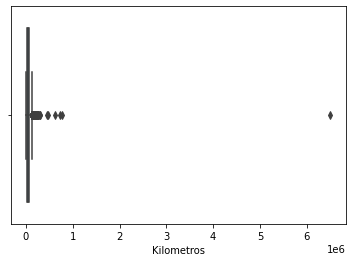

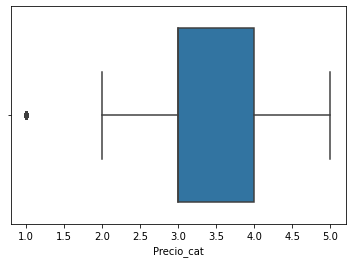

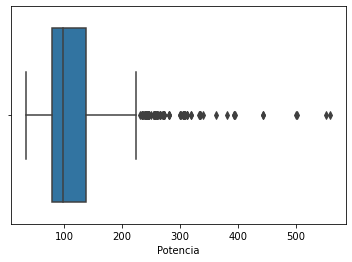

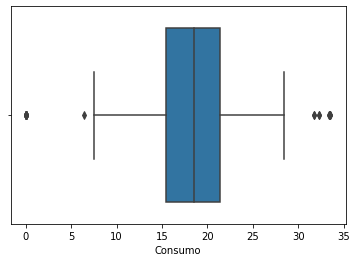

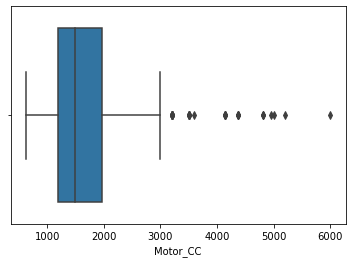

In [21]:
for i in features_ch:
    fig, ax = plt.subplots()
    #plt.xlim(-10,10)
    sns.boxplot(x = i, data = car_train_2, ax = ax)

Tenemos un dataset muy pequeño intentaré eliminar lo menos posible

In [22]:
for feature in features_ch:
    print(feature)
    print('max threshold :',car_train_2[feature].quantile(0.999))
    print('min threshold :',car_train_2[feature].quantile(0.001))

Kilometros
max threshold : 487700.00000004075
min threshold : 1000.0
Precio_cat
max threshold : 5.0
min threshold : 1.0
Potencia
max threshold : 447.0800000000163
min threshold : 34.956
Consumo
max threshold : 33.44
min threshold : 0.0
Motor_CC
max threshold : 4813.975000000042
min threshold : 624.0


In [23]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [24]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """

    def fit (self,X,y=None):
        return self
    
    
    def transform(self,X,y=None):
        X=X[X['Kilometros']< 262000] 
        
        X=X[X['Potencia']<= 530]
        
        X=X[X['Motor_CC']<= 5900 ]
        
        return X

In [25]:
car_train_2 = RemoveOutliers().fit_transform(car_train_2)

In [26]:
for feature in features_ch:
    print(feature)
    print('max threshold :',car_train_2[feature].quantile(0.999))
    print('min threshold :',car_train_2[feature].quantile(0.001))

Kilometros
max threshold : 242402.00000000276
min threshold : 1000.0
Precio_cat
max threshold : 5.0
min threshold : 1.0
Potencia
max threshold : 398.28300000002264
min threshold : 34.9464
Consumo
max threshold : 33.44
min threshold : 0.0
Motor_CC
max threshold : 4806.0
min threshold : 624.0


In [27]:
part = car_train_2['Nombre'].astype(str).str.partition()
car_train_2['Company'] = part[0].str.title()
car_train_2['Car_name'] = part[2]

In [28]:
car_train_2 = car_train_2[car_train_2.Company != 'Bentley']

In [29]:
car_train_2.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat,Company,Car_name
0,1.0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.40,1248,74.00,5,3,Maruti,Swift Dzire ZDI
1,2.0,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51,998,67.04,5,3,Maruti,Wagon R LXI Optional
2,3.0,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32,1198,77.00,6,3,Mahindra,KUV 100 mFALCON D75 K8
3,4.0,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.50,1197,80.00,5,3,Hyundai,i20 1.2 Magna
4,5.0,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.70,1199,88.70,5,3,Honda,Jazz 1.2 SV i VTEC


In [30]:
car_train_2.drop(['Nombre','Car_name'], axis = 1, inplace = True)

## Ordinal categorical data

In [ ]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(y = "Precio_cat", x = "Mano", data = car_train_2 )

In [31]:
car_train_2.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

## Dummy variables

In [32]:
tipo_marchas = car_train_2[['Tipo_marchas']]
tipo_marchas = pd.get_dummies(tipo_marchas, drop_first=True)

In [33]:
ciudad = car_train_2[['Ciudad']]
ciudad = pd.get_dummies(ciudad, drop_first=True)

In [34]:
company = car_train_2[['Company']]
company = pd.get_dummies(company, drop_first=True)

In [35]:
combustible = car_train_2[['Combustible']]
combustible = pd.get_dummies(combustible, drop_first=True)

In [36]:
car_train_2 = pd.concat([car_train_2, company , ciudad , tipo_marchas, combustible], axis = 1)

In [37]:
car_train_2.head()

,id,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,1.0,G,2012.0,83000.0,Diesel,Manual,1,23.40,1248,74.00,...,1,0,0,0,0,0,1,1,0,0
1,2.0,I,2016.0,4800.0,Petrol,Manual,1,20.51,998,67.04,...,0,0,1,0,0,0,1,0,0,1
2,3.0,F,2016.0,26000.0,Diesel,Manual,1,25.32,1198,77.00,...,0,0,0,0,0,0,1,1,0,0
3,4.0,E,2013.0,56127.0,Petrol,Manual,1,18.50,1197,80.00,...,0,0,0,0,0,0,1,0,0,1
4,5.0,H,2017.0,41981.0,Petrol,Manual,1,18.70,1199,88.70,...,0,1,0,0,0,0,1,0,0,1


In [38]:
car_train_2.drop(['id','Ciudad', 'Combustible', 'Tipo_marchas', 'Company'], axis = 1, inplace = True)

In [39]:
car_train_2.shape

(3934, 47)

## Test data

In [40]:
car_test_2 = car_test_2.drop('Descuento',axis=1)

In [41]:
car_test_2.shape

(1159, 12)

In [42]:
car_test_2['Consumo']=car_test_2.Consumo.astype(str).str.partition()[0].astype('float')
car_test_2['Motor_CC']=car_test_2.Motor_CC.astype(str).str.partition()[0].astype('int')
car_test_2['Potencia']=car_test_2.Potencia.astype(str).str.partition()[0].astype('float')
car_test_2['Asientos']=car_test_2.Asientos.astype('int')

In [43]:
part = car_test_2['Nombre'].str.partition()
car_test_2['Company'] = part[0].str.title()
car_test_2.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Company
0,4820,Mercedes-Benz New C-Class C 220 CDI Avantgarde,H,2015,77771,Diesel,Automatic,First,19.27,2143,170.00,5,Mercedes-Benz
1,4821,Hyundai i10 Magna 1.1,J,2011,62000,Petrol,Manual,First,19.81,1086,68.05,5,Hyundai
2,4822,Ford Figo Diesel EXI,C,2010,129986,Diesel,Manual,Second,20.00,1399,68.00,5,Ford
3,4823,Maruti Swift Dzire VXI Optional,D,2015,49900,Petrol,Manual,First,20.85,1197,83.14,5,Maruti
4,4824,Maruti Ritz VXI,J,2010,75319,Petrol,Manual,Second,21.10,1197,85.80,5,Maruti


In [44]:
car_test_2.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

In [45]:
#as Transmission  is an nominal varible lets perform onehotencoding
tipo_marchas = car_test_2[["Tipo_marchas"]]
tipo_marchas = pd.get_dummies(tipo_marchas,drop_first=True)

# Location
ciudad = car_test_2[["Ciudad"]]
ciudad = pd.get_dummies(ciudad,drop_first=True)

#company
company = car_test_2[["Company"]]
company = pd.get_dummies(company ,drop_first=True)

#fuel_type
combustible = car_test_2[["Combustible"]]
combustible = pd.get_dummies(combustible,drop_first=True)

In [46]:
car_test_2 = pd.concat([car_test_2, company , ciudad , tipo_marchas, combustible ], axis = 1)

In [47]:
car_test_2.drop(['Tipo_marchas', 'Ciudad', 'Company', 'Combustible', 'Nombre'], axis = 1, inplace = True)

In [48]:
car_test_2.shape

(1159, 48)

In [49]:
car_test_2.head()

,id,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Company_Audi,Company_Bmw,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,4820,2015,77771,1,19.27,2143,170.00,5,0,0,...,0,1,0,0,0,0,0,1,0,0
1,4821,2011,62000,1,19.81,1086,68.05,5,0,0,...,0,0,0,1,0,0,1,0,0,1
2,4822,2010,129986,2,20.00,1399,68.00,5,0,0,...,0,0,0,0,0,0,1,1,0,0
3,4823,2015,49900,1,20.85,1197,83.14,5,0,0,...,0,0,0,0,0,0,1,0,0,1
4,4824,2010,75319,2,21.10,1197,85.80,5,0,0,...,0,0,0,1,0,0,1,0,0,1


## Construimos modelo

In [50]:
scoring = "accuracy"
N_SPLITS = 5

In [51]:
y = car_train_2['Precio_cat']
X = car_train_2.drop('Precio_cat', axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
classifier_models(X_train, X_test, y_train, y_test, scoring, N_SPLITS)

KNeighborsClassifier

cross_val_score:  0.5208110631640044 0.025726624988872678
Accuracy on Training set:  0.6723863997457896
Accuracy on Testing set:  0.5184243964421855
		Error Table
accuracy_score        :  0.5184243964421855
f1_score macro        :  0.4152284754682144
f1_score micro        :  0.5184243964421855
precision_score macro :  0.43442669358695074
precision_score micro :  0.5184243964421855
recall_score macro.   :  0.40686305519257926
recall_score micro.   :  0.5184243964421855

DecisionTreeClassifier

cross_val_score:  0.7629474853004264 0.00512547722349131
Accuracy on Training set:  1.0
Accuracy on Testing set:  0.758576874205845
		Error Table
accuracy_score        :  0.758576874205845
f1_score macro        :  0.7197345857962494
f1_score micro        :  0.758576874205845
precision_score macro :  0.7189350100443005
precision_score micro :  0.758576874205845
recall_score macro.   :  0.7223409693884114
recall_score micro.   :  0.758576874205845

RandomForestClassifier

cross

In [54]:
# StandardScaler
sc = StandardScaler()
X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.fit_transform(X_test)

In [55]:
classifier_models(X_train_standard, X_test_standard, y_train, y_test, scoring, N_SPLITS)

KNeighborsClassifier

cross_val_score:  0.6717470411588059 0.023181493321011853
Accuracy on Training set:  0.7893231649189705
Accuracy on Testing set:  0.6747141041931385
		Error Table
accuracy_score        :  0.6747141041931385
f1_score macro        :  0.6012555890693456
f1_score micro        :  0.6747141041931385
precision_score macro :  0.6173544978858522
precision_score micro :  0.6747141041931385
recall_score macro.   :  0.5945291047702824
recall_score micro.   :  0.6747141041931385

DecisionTreeClassifier

cross_val_score:  0.7629474853004264 0.00512547722349131
Accuracy on Training set:  1.0
Accuracy on Testing set:  0.7204574332909784
		Error Table
accuracy_score        :  0.7204574332909784
f1_score macro        :  0.6871860803382714
f1_score micro        :  0.7204574332909786
precision_score macro :  0.6792695401655968
precision_score micro :  0.7204574332909784
recall_score macro.   :  0.7037605183121577
recall_score micro.   :  0.7204574332909784

RandomForestClassifier

cr

In [56]:
svm_models(X_train_standard, X_test_standard, y_train, y_test, scoring, N_SPLITS)


SVM


linear

cross_val_score:  0.806150856739092 0.019253247472082756
Accuracy on Training set:  0.8328566889100731
Accuracy on Testing set:  0.843710292249047
		Error Table
accuracy_score        :  0.843710292249047
f1_score macro        :  0.8347997678643893
f1_score micro        :  0.843710292249047
precision_score macro :  0.8409371996311711
precision_score micro :  0.843710292249047
recall_score macro.   :  0.829268521025103
recall_score micro.   :  0.843710292249047

poly

cross_val_score:  0.6545880334115628 0.01259681449696551
Accuracy on Training set:  0.732761360025421
Accuracy on Testing set:  0.6607369758576874
		Error Table
accuracy_score        :  0.6607369758576874
f1_score macro        :  0.5392684975378479
f1_score micro        :  0.6607369758576874
precision_score macro :  0.69419403755054
precision_score micro :  0.6607369758576874
recall_score macro.   :  0.5065734939770306
recall_score micro.   :  0.6607369758576874

rbf

cross_val_score:  0.7820122643652055 0.01

Profundizamos sobre los que han conseguido mejores puntuaciones

### Best Random Forest Classifier

In [57]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [58]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [59]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                               param_distributions = random_grid, 
                               scoring=scoring, 
                               n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [60]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=20, total=   2.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   3.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   2.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   2.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=30, total=   2.8s
[CV] n_estimators=1000, min_

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   2.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=5, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [61]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [62]:
best_rfc = RandomForestClassifier(n_estimators = 600, min_samples_split = 2, 
                                  min_samples_leaf = 1, max_features = 'sqrt', max_depth = 20)

In [63]:
model_report(best_rfc, X_train, X_test, y_train, y_test, scoring, N_SPLITS)

cross_val_score:  0.8207777525424584 0.012851022056908024
Accuracy on Training set:  0.9955513187162377
Accuracy on Testing set:  0.8246505717916137
		Error Table
accuracy_score        :  0.8246505717916137
f1_score macro        :  0.7970419956844961
f1_score micro        :  0.8246505717916137
precision_score macro :  0.8438937906753556
precision_score micro :  0.8246505717916137
recall_score macro.   :  0.7661974768387624
recall_score micro.   :  0.8246505717916137


### Best SVC

In [70]:
# Create the random grid

random_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
               'gamma': ['scale', 'auto'],
               'C': [0.1,1, 10, 100]}

In [71]:
# search across 100 different combinations
svc_random = RandomizedSearchCV(estimator = SVC(), 
                               param_distributions = random_grid, 
                               scoring=scoring, 
                               n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [72]:
svc_random.fit(X_train_standard, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] kernel=poly, gamma=auto, C=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... kernel=poly, gamma=auto, C=100, total=   0.3s
[CV] kernel=poly, gamma=auto, C=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................... kernel=poly, gamma=auto, C=100, total=   0.3s
[CV] kernel=poly, gamma=auto, C=100 ..................................
[CV] ................... kernel=poly, gamma=auto, C=100, total=   0.3s
[CV] kernel=poly, gamma=auto, C=100 ..................................
[CV] ................... kernel=poly, gamma=auto, C=100, total=   0.3s
[CV] kernel=poly, gamma=auto, C=100 ..................................
[CV] ................... kernel=poly, gamma=auto, C=100, total=   0.3s
[CV] kernel=sigmoid, gamma=auto, C=1 .................................
[CV] .................. kernel=sigmoid, gamma=auto, C=1, total=   0.3s
[CV] kernel=sigmoid, gamma=auto, C=1 .................................
[CV] .................. kernel=sigmoid, gamma=auto, C=1, total=   0.4s
[CV] kernel=sigmoid, gamma=auto, C=1 .................................
[CV] .................. kernel=sigmoid, gamma=auto, C=1, total=   0.3s
[CV] kernel=sigmoid, gamma=auto, C=1 .................................
[CV] .

[CV] ................. kernel=linear, gamma=scale, C=10, total=   0.6s
[CV] kernel=poly, gamma=auto, C=0.1 ..................................
[CV] ................... kernel=poly, gamma=auto, C=0.1, total=   0.4s
[CV] kernel=poly, gamma=auto, C=0.1 ..................................
[CV] ................... kernel=poly, gamma=auto, C=0.1, total=   0.4s
[CV] kernel=poly, gamma=auto, C=0.1 ..................................
[CV] ................... kernel=poly, gamma=auto, C=0.1, total=   0.4s
[CV] kernel=poly, gamma=auto, C=0.1 ..................................
[CV] ................... kernel=poly, gamma=auto, C=0.1, total=   0.4s
[CV] kernel=poly, gamma=auto, C=0.1 ..................................
[CV] ................... kernel=poly, gamma=auto, C=0.1, total=   0.4s
[CV] kernel=poly, gamma=auto, C=1 ....................................
[CV] ..................... kernel=poly, gamma=auto, C=1, total=   0.3s
[CV] kernel=poly, gamma=auto, C=1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   51.4s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=15, n_jobs=1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=2)

In [73]:
svc_random.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 1}

In [75]:
best_svc = SVC(kernel = 'linear', gamma = 'scale', C = 1)

In [76]:
model_report(best_svc, X_train_standard, X_test_standard, y_train, y_test, scoring, N_SPLITS)

cross_val_score:  0.806150856739092 0.019253247472082756
Accuracy on Training set:  0.8328566889100731
Accuracy on Testing set:  0.843710292249047
		Error Table
accuracy_score        :  0.843710292249047
f1_score macro        :  0.8347997678643893
f1_score micro        :  0.843710292249047
precision_score macro :  0.8409371996311711
precision_score micro :  0.843710292249047
recall_score macro.   :  0.829268521025103
recall_score micro.   :  0.843710292249047


## Generando el fichero para Kaggle

In [ ]:
tests_ids_2 = car_test_2['id']
del car_test_2['id']

In [ ]:
predict_2 = best_rfc.predict(scaled_features_test)
print(predict_2)
# Generamos 
df_result = pd.DataFrame({'id': tests_ids_2, 'Precio_cat': predict_2 })
df_result.to_csv("mis_resultados_2.csv", index=False)

<a id="section-3"></a>
# Versión 3


In [85]:
car_train_3 = car_train.copy()
car_test_3 = car_test.copy()

In [86]:
car_train_3.drop(['id'], axis = 1, inplace = True)

In [87]:
car_train_3.head()

,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,3
1,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3
2,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,NaN,3
3,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,3
4,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,3


In [88]:
print("Shape of train data Before dropping any Row: ", car_train_3.shape)
for i in car_train_3.columns:
    if car_train_3[i].isnull().sum() > 0:
        if i != "Descuento":
            car_train_3 = car_train_3[car_train_3[i].notna()]
            print("Shape after dropping nulls in " + i + ":", car_train_3.shape)

Shape of train data Before dropping any Row:  (4819, 13)
Shape after dropping nulls in Nombre: (4747, 13)
Shape after dropping nulls in Ciudad: (4676, 13)
Shape after dropping nulls in Año: (4606, 13)
Shape after dropping nulls in Kilometros: (4540, 13)
Shape after dropping nulls in Combustible: (4475, 13)
Shape after dropping nulls in Tipo_marchas: (4410, 13)
Shape after dropping nulls in Mano: (4342, 13)
Shape after dropping nulls in Consumo: (4274, 13)
Shape after dropping nulls in Motor_CC: (4185, 13)
Shape after dropping nulls in Potencia: (4060, 13)
Shape after dropping nulls in Asientos: (4001, 13)


In [89]:
car_train_3 = car_train_3.reset_index(drop=True)

Well after using .notna() we have many absent indexes (Eg: If row no 47 was droped then after 46 we have 48 index), so I reset the index and droping the present index.

In [90]:
car_train_3['Consumo']=car_train_3.Consumo.astype(str).str.partition()[0].astype('float')
car_train_3['Motor_CC']=car_train_3.Motor_CC.astype(str).str.partition()[0].astype('int')
car_train_3['Potencia']=car_train_3.Potencia.astype(str).str.partition()[0].astype('float')
car_train_3['Asientos']=car_train_3.Asientos.astype('int')

In [91]:
car_train_3['Descuento'] = car_train_3['Descuento'].astype(float)

In [92]:
part = car_train_3['Nombre'].astype(str).str.partition()
car_train_3['Company'] = part[0].str.title()

## Categorical data

In [93]:
car_train_3["Ciudad"].value_counts()

B    538
F    496
E    451
H    449
C    385
J    361
I    339
D    313
G    257
K    254
L    158
Name: Ciudad, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

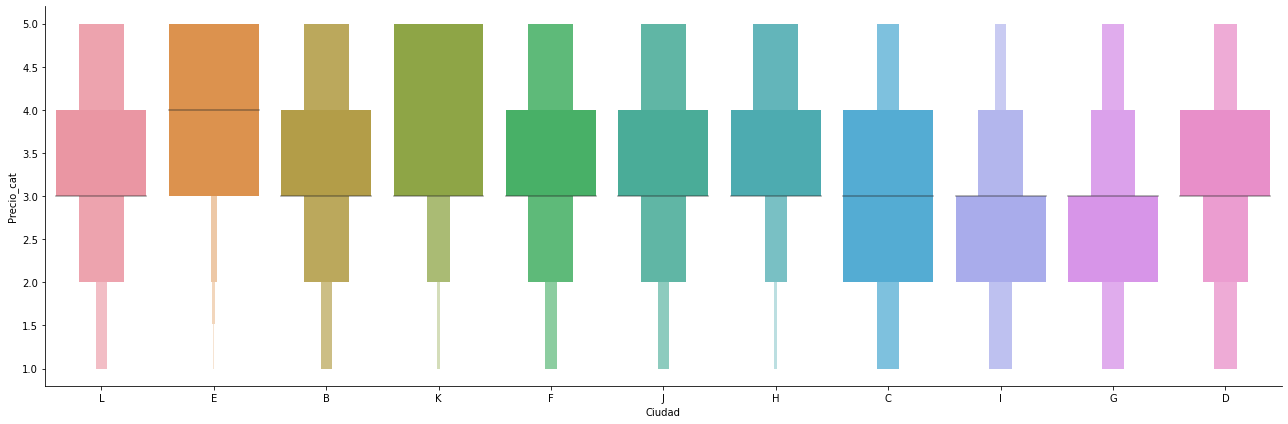

In [94]:
sns.catplot(y='Precio_cat',x = 'Ciudad', data= car_train_3.sort_values('Precio_cat',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [95]:
ciudad = car_train_3[['Ciudad']]
ciudad = pd.get_dummies(ciudad,drop_first=True)
#ciudad.head()

In [96]:
car_train_3["Combustible"].value_counts()

Diesel    2172
Petrol    1784
CNG         38
LPG          7
Name: Combustible, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

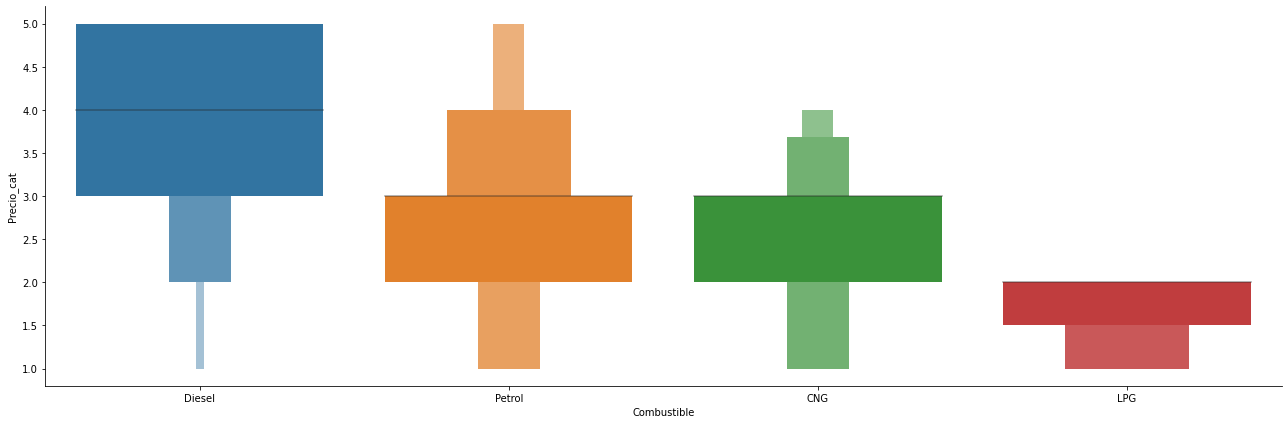

In [97]:
sns.catplot(y='Precio_cat',x = 'Combustible', data= car_train_3.sort_values('Precio_cat',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [98]:
combustible = car_train_3[['Combustible']]
combustible = pd.get_dummies(combustible,drop_first=True)
#combustible.head()

In [99]:
car_train_3["Tipo_marchas"].value_counts()

Manual       2852
Automatic    1149
Name: Tipo_marchas, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

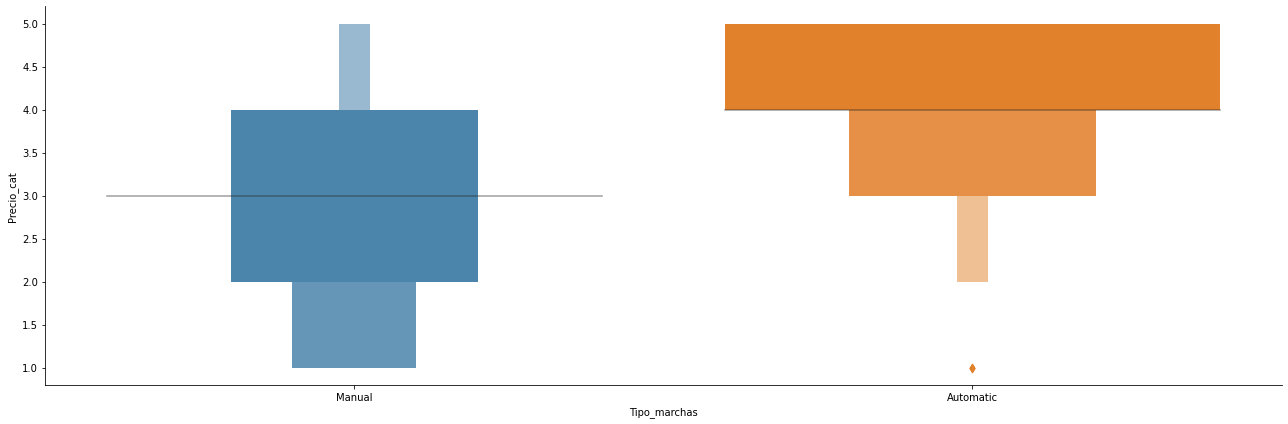

In [100]:
sns.catplot(y='Precio_cat',x = 'Tipo_marchas', data= car_train_3.sort_values('Precio_cat',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [101]:
tipo_marchas = car_train_3[['Tipo_marchas']]
tipo_marchas = pd.get_dummies(tipo_marchas,drop_first=True)
#tipo_marchas.head()

In [102]:
car_train_3["Mano"].value_counts()

First             3372
Second             557
Third               66
Fourth & Above       6
Name: Mano, dtype: int64

In [103]:
car_train_3.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
#car_train_3.head()

In [104]:
car_train_3['Company'].value_counts()

Maruti           788
Hyundai          733
Honda            436
Toyota           272
Volkswagen       220
Mercedes-Benz    208
Ford             195
Mahindra         191
Bmw              174
Audi             152
Tata             121
Skoda            118
Renault          104
Chevrolet         74
Nissan            54
Land              37
Jaguar            27
Mitsubishi        19
Mini              18
Fiat              16
Jeep              11
Porsche           11
Volvo             10
Datsun             7
Isuzu              2
Lamborghini        1
Bentley            1
Force              1
Name: Company, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

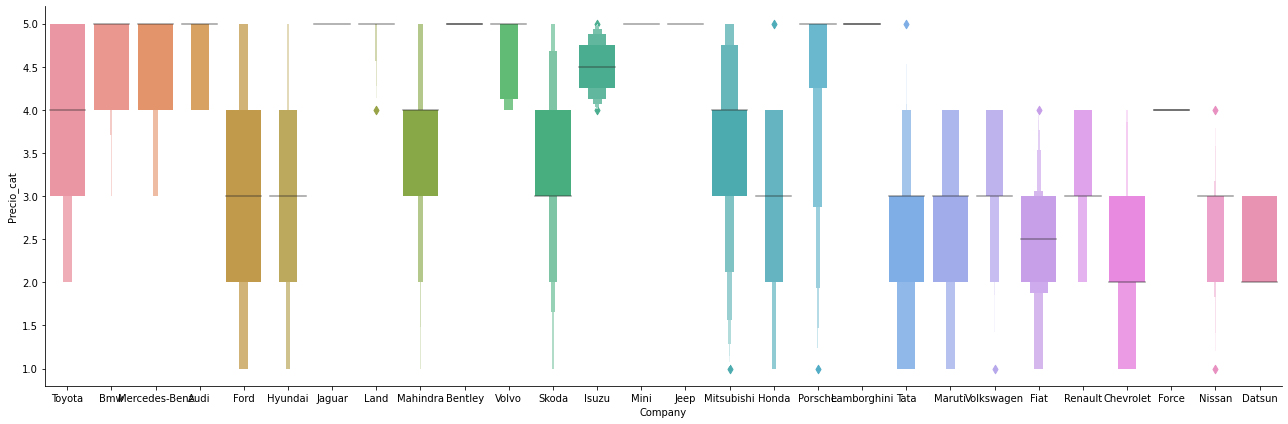

In [105]:
sns.catplot(y='Precio_cat',x = 'Company', data= car_train_3.sort_values('Precio_cat',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [106]:
# A lot of variation so let's drop them
car_train_3.drop(["Company"], axis=1,inplace=True)

In [107]:
car_train_3 = pd.concat([car_train_3, ciudad , combustible, tipo_marchas],axis=1)

In [108]:
car_train_3.drop(["Nombre", "Ciudad", "Combustible", "Tipo_marchas", "Descuento"], axis = 1, inplace = True)

In [109]:
car_train_3.head()

,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat,Ciudad_C,Ciudad_D,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Combustible_Diesel,Combustible_LPG,Combustible_Petrol,Tipo_marchas_Manual
0,2012.0,83000.0,1,23.40,1248,74.00,5,3,0,0,...,1,0,0,0,0,0,1,0,0,1
1,2016.0,4800.0,1,20.51,998,67.04,5,3,0,0,...,0,0,1,0,0,0,0,0,1,1
2,2016.0,26000.0,1,25.32,1198,77.00,6,3,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2013.0,56127.0,1,18.50,1197,80.00,5,3,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2017.0,41981.0,1,18.70,1199,88.70,5,3,0,0,...,0,1,0,0,0,0,0,0,1,1


## Prepare test data

In [110]:
car_test_3.head()

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento
0,4820,Mercedes-Benz New C-Class C 220 CDI Avantgarde,H,2015,77771,Diesel,Automatic,First,19.27 kmpl,2143 CC,170 bhp,5.0,NaN
1,4821,Hyundai i10 Magna 1.1,J,2011,62000,Petrol,Manual,First,19.81 kmpl,1086 CC,68.05 bhp,5.0,NaN
2,4822,Ford Figo Diesel EXI,C,2010,129986,Diesel,Manual,Second,20.0 kmpl,1399 CC,68 bhp,5.0,NaN
3,4823,Maruti Swift Dzire VXI Optional,D,2015,49900,Petrol,Manual,First,20.85 kmpl,1197 CC,83.14 bhp,5.0,NaN
4,4824,Maruti Ritz VXI,J,2010,75319,Petrol,Manual,Second,21.1 kmpl,1197 CC,85.80 bhp,5.0,NaN


In [111]:
car_test_3['Consumo']=car_test_3.Consumo.astype(str).str.partition()[0].astype('float')
car_test_3['Motor_CC']=car_test_3.Motor_CC.astype(str).str.partition()[0].astype('int')
car_test_3['Potencia']=car_test_3.Potencia.astype(str).str.partition()[0].astype('float')
car_test_3['Asientos']=car_test_3.Asientos.astype('int')

In [112]:
car_test_3.drop(["Nombre","Descuento"],axis=1,inplace=True)

In [113]:
var = 'Ciudad'
Location = car_test_3[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

var = 'Combustible'
Fuel_t = car_test_3[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Tipo_marchas'
Transmission = car_test_3[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

car_test_3.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
car_test_3.head()

car_test_3= pd.concat([car_test_3,Location,Fuel_t,Transmission],axis=1)
car_test_3.head()

car_test_3.drop(["Ciudad","Combustible","Tipo_marchas"],axis=1,inplace=True)
car_test_3.head()

print("Final Test Size: ", car_test_3.shape)

Final Test Size:  (1159, 22)


In [114]:
car_test_3.head()

,id,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Ciudad_C,Ciudad_D,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Combustible_Diesel,Combustible_LPG,Combustible_Petrol,Tipo_marchas_Manual
0,4820,2015,77771,1,19.27,2143,170.00,5,0,0,...,0,1,0,0,0,0,1,0,0,0
1,4821,2011,62000,1,19.81,1086,68.05,5,0,0,...,0,0,0,1,0,0,0,0,1,1
2,4822,2010,129986,2,20.00,1399,68.00,5,1,0,...,0,0,0,0,0,0,1,0,0,1
3,4823,2015,49900,1,20.85,1197,83.14,5,0,1,...,0,0,0,0,0,0,0,0,1,1
4,4824,2010,75319,2,21.10,1197,85.80,5,0,0,...,0,0,0,1,0,0,0,0,1,1


In [115]:
car_test_3.columns

Index(['id', 'Año', 'Kilometros', 'Mano', 'Consumo', 'Motor_CC', 'Potencia',
       'Asientos', 'Ciudad_C', 'Ciudad_D', 'Ciudad_E', 'Ciudad_F', 'Ciudad_G',
       'Ciudad_H', 'Ciudad_I', 'Ciudad_J', 'Ciudad_K', 'Ciudad_L',
       'Combustible_Diesel', 'Combustible_LPG', 'Combustible_Petrol',
       'Tipo_marchas_Manual'],
      dtype='object')

## Final features selection

In [116]:
car_train_3.columns

Index(['Año', 'Kilometros', 'Mano', 'Consumo', 'Motor_CC', 'Potencia',
       'Asientos', 'Precio_cat', 'Ciudad_C', 'Ciudad_D', 'Ciudad_E',
       'Ciudad_F', 'Ciudad_G', 'Ciudad_H', 'Ciudad_I', 'Ciudad_J', 'Ciudad_K',
       'Ciudad_L', 'Combustible_Diesel', 'Combustible_LPG',
       'Combustible_Petrol', 'Tipo_marchas_Manual'],
      dtype='object')

In [117]:
X = car_train_3.drop('Precio_cat', axis=1)
y = car_train_3['Precio_cat']

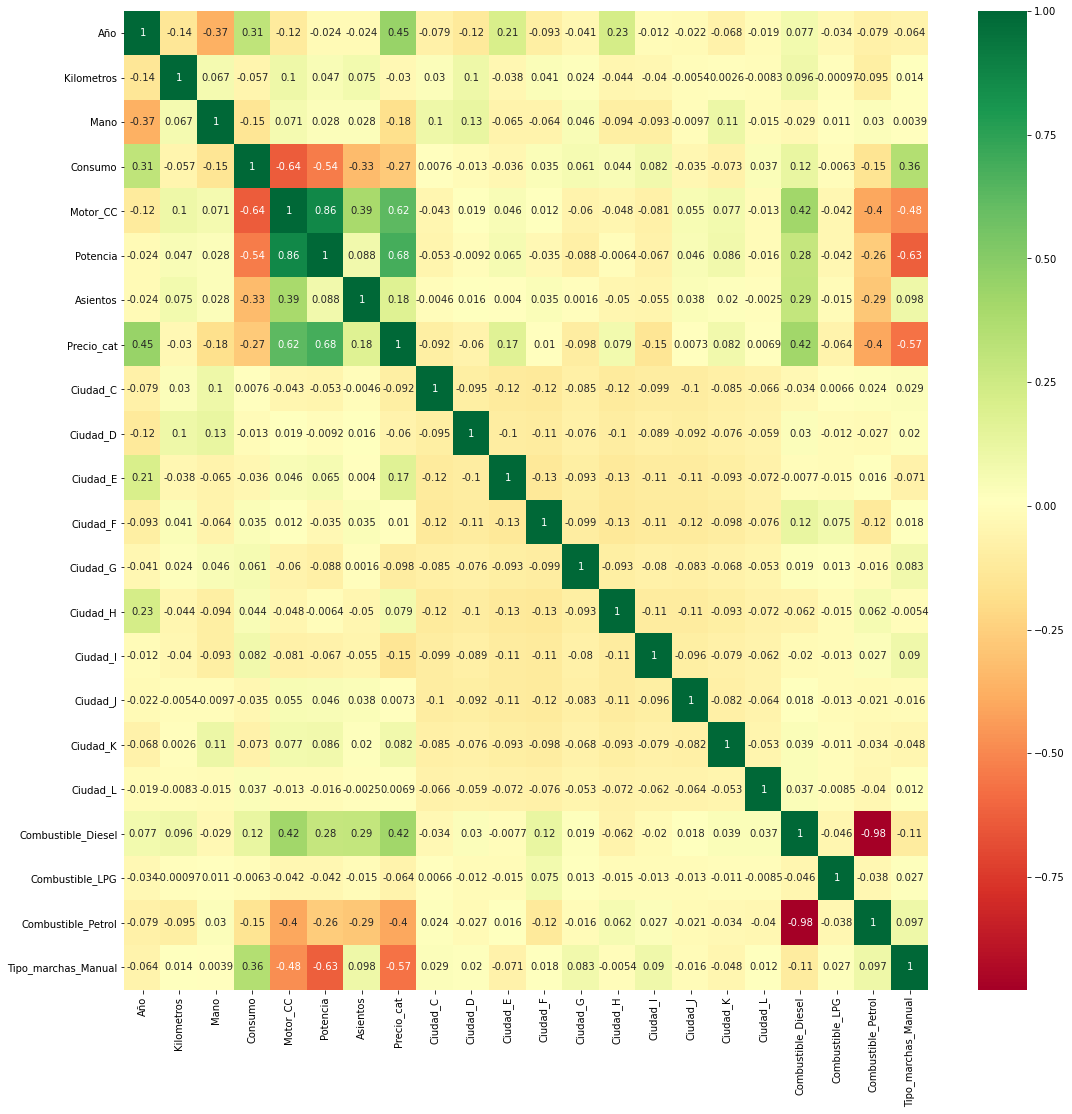

In [118]:
plt.figure(figsize=(18,18))
sns.heatmap(car_train_3.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [119]:
selection= ExtraTreesClassifier()
selection.fit(X,y)

ExtraTreesClassifier()

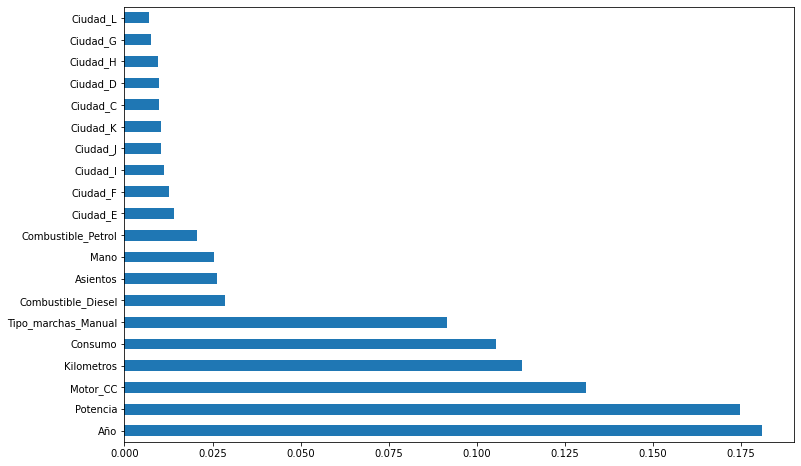

In [120]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Construir el modelo

In [121]:
scoring = "accuracy"
N_SPLITS = 5

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [123]:
classifier_models(X_train, X_test, y_train, y_test, scoring, N_SPLITS)

KNeighborsClassifier

cross_val_score:  0.5118750000000001 0.01302041665999978
Accuracy on Training set:  0.6671875
Accuracy on Testing set:  0.5255930087390761
		Error Table
accuracy_score        :  0.5255930087390761
f1_score macro        :  0.39461186552136185
f1_score micro        :  0.5255930087390761
precision_score macro :  0.43206912429535843
precision_score micro :  0.5255930087390761
recall_score macro.   :  0.3799098975753818
recall_score micro.   :  0.5255930087390761

DecisionTreeClassifier

cross_val_score:  0.745 0.006202947887899761
Accuracy on Training set:  1.0
Accuracy on Testing set:  0.7640449438202247
		Error Table
accuracy_score        :  0.7640449438202247
f1_score macro        :  0.7280697575768901
f1_score micro        :  0.7640449438202248
precision_score macro :  0.7326846142169996
precision_score micro :  0.7640449438202247
recall_score macro.   :  0.725069073704651
recall_score micro.   :  0.7640449438202247

RandomForestClassifier

cross_val_score:  0.808

In [124]:
# StandardScaler
sc = StandardScaler()
X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.fit_transform(X_test)

In [125]:
classifier_models(X_train_standard, X_test_standard, y_train, y_test, scoring, N_SPLITS)

KNeighborsClassifier

cross_val_score:  0.6903124999999999 0.020019521722558706
Accuracy on Training set:  0.7896875
Accuracy on Testing set:  0.7378277153558053
		Error Table
accuracy_score        :  0.7378277153558053
f1_score macro        :  0.6927013731862174
f1_score micro        :  0.7378277153558053
precision_score macro :  0.7179163075048771
precision_score micro :  0.7378277153558053
recall_score macro.   :  0.672845828918202
recall_score micro.   :  0.7378277153558053

DecisionTreeClassifier

cross_val_score:  0.7446875 0.006449927325171981
Accuracy on Training set:  1.0
Accuracy on Testing set:  0.7240948813982522
		Error Table
accuracy_score        :  0.7240948813982522
f1_score macro        :  0.688081112460602
f1_score micro        :  0.7240948813982522
precision_score macro :  0.6947831563104424
precision_score micro :  0.7240948813982522
recall_score macro.   :  0.6855933984667643
recall_score micro.   :  0.7240948813982522

RandomForestClassifier

cross_val_score:  0.8

In [126]:
svm_models(X_train_standard, X_test_standard, y_train, y_test, scoring, N_SPLITS)


SVM


linear

cross_val_score:  0.773125 0.006510208329999916
Accuracy on Training set:  0.779375
Accuracy on Testing set:  0.7602996254681648
		Error Table
accuracy_score        :  0.7602996254681648
f1_score macro        :  0.7142949200484953
f1_score micro        :  0.7602996254681647
precision_score macro :  0.73949692985675
precision_score micro :  0.7602996254681648
recall_score macro.   :  0.6954164573597146
recall_score micro.   :  0.7602996254681648

poly

cross_val_score:  0.7115625 0.01271686871835987
Accuracy on Training set:  0.7721875
Accuracy on Testing set:  0.7465667915106118
		Error Table
accuracy_score        :  0.7465667915106118
f1_score macro        :  0.685326063056158
f1_score micro        :  0.7465667915106118
precision_score macro :  0.7731217528396546
precision_score micro :  0.7465667915106118
recall_score macro.   :  0.6385720621740477
recall_score micro.   :  0.7465667915106118

rbf

cross_val_score:  0.7609374999999999 0.01104854345603983
Accuracy on Tra

## Best Random Forest Classifier

In [127]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [128]:
rf_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf}

In [129]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                               param_distributions = rf_grid, 
                               scoring=scoring, 
                               n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [130]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [131]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [132]:
best_rfc = RandomForestClassifier(n_estimators = 1000, min_samples_split = 2,
                                  min_samples_leaf = 1, max_features = 'sqrt', max_depth = 25)

In [133]:
model_report(best_rfc, X_train, X_test, y_train, y_test, scoring, N_SPLITS)

cross_val_score:  0.8121875000000001 0.007743444808352433
Accuracy on Training set:  1.0
Accuracy on Testing set:  0.8476903870162297
		Error Table
accuracy_score        :  0.8476903870162297
f1_score macro        :  0.8075606925342624
f1_score micro        :  0.8476903870162297
precision_score macro :  0.8426020704552298
precision_score micro :  0.8476903870162297
recall_score macro.   :  0.7836262489719452
recall_score micro.   :  0.8476903870162297


### Best SVC 

In [134]:
# Create the random grid

random_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
               'gamma': ['scale', 'auto'],
               'C': [0.1,1, 10, 100]}

In [135]:
# search across 100 different combinations
svc_random = RandomizedSearchCV(estimator = SVC(), 
                               param_distributions = random_grid, 
                               scoring=scoring, 
                               n_iter = 15, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [136]:
svc_random.fit(X_train_standard, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] kernel=poly, gamma=auto, C=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... kernel=poly, gamma=auto, C=100, total=   0.4s
[CV] kernel=poly, gamma=auto, C=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ................... kernel=poly, gamma=auto, C=100, total=   0.3s
[CV] kernel=poly, gamma=auto, C=100 ..................................
[CV] ................... kernel=poly, gamma=auto, C=100, total=   0.5s
[CV] kernel=poly, gamma=auto, C=100 ..................................
[CV] ................... kernel=poly, gamma=auto, C=100, total=   0.3s
[CV] kernel=poly, gamma=auto, C=100 ..................................
[CV] ................... kernel=poly, gamma=auto, C=100, total=   0.4s
[CV] kernel=sigmoid, gamma=auto, C=1 .................................
[CV] .................. kernel=sigmoid, gamma=auto, C=1, total=   0.4s
[CV] kernel=sigmoid, gamma=auto, C=1 .................................
[CV] .................. kernel=sigmoid, gamma=auto, C=1, total=   0.4s
[CV] kernel=sigmoid, gamma=auto, C=1 .................................
[CV] .................. kernel=sigmoid, gamma=auto, C=1, total=   0.4s
[CV] kernel=sigmoid, gamma=auto, C=1 .................................
[CV] .

[CV] ................. kernel=linear, gamma=scale, C=10, total=   0.7s
[CV] kernel=poly, gamma=auto, C=0.1 ..................................
[CV] ................... kernel=poly, gamma=auto, C=0.1, total=   0.6s
[CV] kernel=poly, gamma=auto, C=0.1 ..................................
[CV] ................... kernel=poly, gamma=auto, C=0.1, total=   0.4s
[CV] kernel=poly, gamma=auto, C=0.1 ..................................
[CV] ................... kernel=poly, gamma=auto, C=0.1, total=   0.4s
[CV] kernel=poly, gamma=auto, C=0.1 ..................................
[CV] ................... kernel=poly, gamma=auto, C=0.1, total=   0.3s
[CV] kernel=poly, gamma=auto, C=0.1 ..................................
[CV] ................... kernel=poly, gamma=auto, C=0.1, total=   0.2s
[CV] kernel=poly, gamma=auto, C=1 ....................................
[CV] ..................... kernel=poly, gamma=auto, C=1, total=   0.2s
[CV] kernel=poly, gamma=auto, C=1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   47.2s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=15, n_jobs=1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=2)

In [138]:
svc_random.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 1}

In [139]:
best_svc = SVC(kernel = 'linear', gamma = 'scale', C = 1)

In [140]:
model_report(best_svc, X_train_standard, X_test_standard, y_train, y_test, scoring, N_SPLITS)

cross_val_score:  0.773125 0.006510208329999916
Accuracy on Training set:  0.779375
Accuracy on Testing set:  0.7602996254681648
		Error Table
accuracy_score        :  0.7602996254681648
f1_score macro        :  0.7142949200484953
f1_score micro        :  0.7602996254681647
precision_score macro :  0.73949692985675
precision_score micro :  0.7602996254681648
recall_score macro.   :  0.6954164573597146
recall_score micro.   :  0.7602996254681648


## Generando fichero kaggle

In [ ]:
tests_ids_3 = car_test_3['id']
del car_test_3['id']

In [ ]:
predict_3 = best_rnd_clf.predict(final_car_test_3)
print(predict_3)
# Generamos 
df_result = pd.DataFrame({'id': tests_ids_3, 'Precio_cat': predict_3 })
df_result.to_csv("mis_resultados_3.csv", index=False)